# Maximum Mean Discrepancy (MMD)

__How can we (alternatively) compare two distributions $\mathcal{X}$ and $\mathcal{Y}$?__

> Make all the distribution moments identical.

NOTE: This is not guaranteed to make the distributions identical.

- Consider two dataset $\{x_i\}\in\mathcal{X}$ and $\{y_i\}\in\mathcal{Y}$;
- consider a map $\psi:\Re^d\to\Re^D$ (with some properties we will not investigate);
- under certain conditions:

$$\Large
\mathcal{L}(x,y) = \|\mu_x\psi(x) - \mu_y\psi(y)\|
$$

is a valid distance function between distributions.

## Example

If $\mathcal{X}$ and $\mathcal{Y}$ are normal distributions in $\Re$, than the choice:

$$\Large
\psi(x) = 
\begin{pmatrix}
x \\ x^2
\end{pmatrix}
$$

Allows to compare both the first and second moment.

## The MMD loss function

To minimized this difference consider the square of the norm:

$$\large
\begin{eqnarray}
\mathcal{L}_{MMD} &=& \|\mathbb{E}_x\psi(x) - \mathbb{E}_y\psi(y)\|^2 \\
                  &=& \left(\mathbb{E}_x\psi(x) - \mathbb{E}_y\psi(y)\right)^T
                      \left(\mathbb{E}_x\psi(x) - \mathbb{E}_y\psi(y)\right) \\
                  &=& \mathbb{E}_x\psi(x)^T\mathbb{E}_x\psi(x)
                      + \mathbb{E}_y\psi(y)^T\mathbb{E}_y\psi(y)
                      - 2\mathbb{E}_x\psi(x)^T\mathbb{E}_y\psi(y) \\
                  &\approx& 
                        \sum_{ij}\psi(x_i)^T\psi(x_j) 
                      + \sum_{ij}\psi(y_i)^T\psi(y_j)
                      - 2\sum_{ij}\psi(x_i)^T\psi(y_j) \\
                  &\approx& 
                        \sum_{ij}k(x_i,x_j) 
                      + \sum_{ij}k(y_i,y_j)
                      - 2\sum_{ij}k(x_i,y_j) \\
\end{eqnarray}
$$

where we used the kernel-trick to implicitly represent $\psi(\cdot)$ inner products as:

$$\Large
\psi(a) \cdot \psi(b) = k(a,b)
$$

calling $k(\cdot,\cdot)$ the __kernel function__.

This allows $\psi$ to map points in an infinite-dimensional (reproducing kernel Hilbert) space.

### NOTE

Minimizing $\mathcal{L}_{MMD}$ minimizes $\mathbb{E}k(x,x)$ and $\mathbb{E}k(y,y)$ whilst maximizes $\mathbb{E}k(x,y)$.  
Interpreting $k$ as a similarity function, this intuitively means:

- preventing collapse of $\mathcal{X}$ and $\mathcal{Y}$ distributions by __minimizing intra-similarity__;
- forcing distributions to be similar by __maximizing inter-simmilarity__ between samples drawn from them.

### NOTE 2

This loss do not require sampling IN the network.  
__No reparameterization trick needed__, just a sampling loss.

In [1]:
# The dataset:
from dataset import load_mnist, PairDataset

train_ds = PairDataset(load_mnist(train=True)[0])
test_ds = PairDataset(load_mnist(train=False)[0])

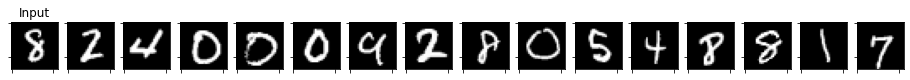

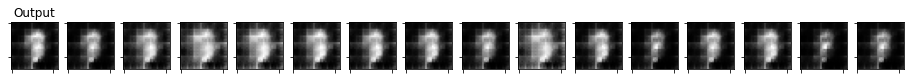

train_mse[1] = 0.12808598473351052
train_mmd[1] = 0.018014280846778384
train_loss[1] = 0.13709312512519511
test_mse[1] = 0.0686872996389866
test_mmd[1] = 0.011679655313491822
test_loss[1] = 0.07452712729573249



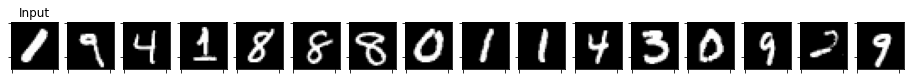

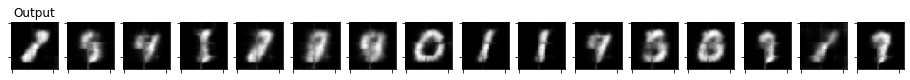

train_mse[2] = 0.05763139057349651
train_mmd[2] = 0.00918380656140916
train_loss[2] = 0.06222329383834879
test_mse[2] = 0.04967613965272903
test_mmd[2] = 0.006368529796600342
test_loss[2] = 0.05286040455102921



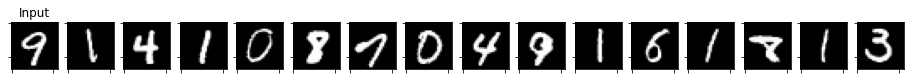

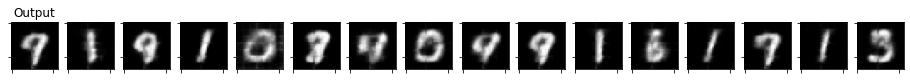

train_mse[3] = 0.04633223515875796
train_mmd[3] = 0.004953677096265428
train_loss[3] = 0.04880907370689067
test_mse[3] = 0.043431130889803174
test_mmd[3] = 0.005741384625434875
test_loss[3] = 0.04630182320252061



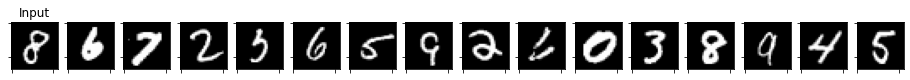

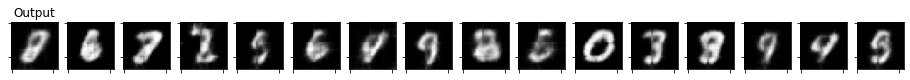

train_mse[4] = 0.0415746678697302
train_mmd[4] = 0.004203878565037504
train_loss[4] = 0.04367660715224895
test_mse[4] = 0.03878973126411438
test_mmd[4] = 0.004162397980690002
test_loss[4] = 0.040870930254459384



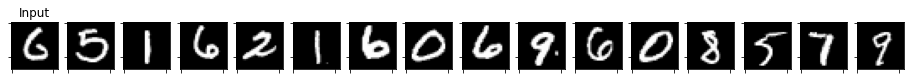

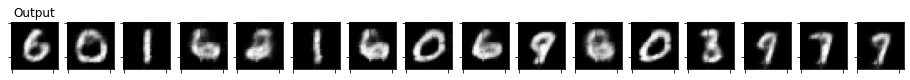

train_mse[5] = 0.038138424858767936
train_mmd[5] = 0.0035798747488792904
train_loss[5] = 0.03992836223320758
test_mse[5] = 0.0365897448733449
test_mmd[5] = 0.005063194036483765
test_loss[5] = 0.03912134189158678



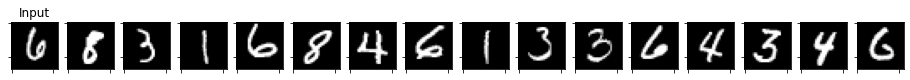

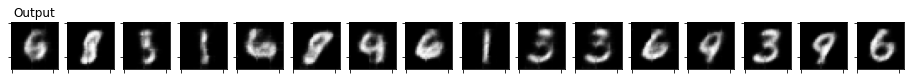

train_mse[6] = 0.03597171038706252
train_mmd[6] = 0.003514769229483097
train_loss[6] = 0.03772909500180407
test_mse[6] = 0.034434336330741645
test_mmd[6] = 0.004289120435714722
test_loss[6] = 0.036578896548599006



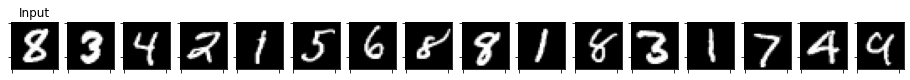

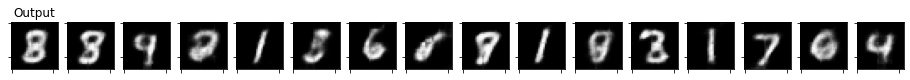

train_mse[7] = 0.03405262361815635
train_mmd[7] = 0.003167448652551529
train_loss[7] = 0.035636347944432115
test_mse[7] = 0.03264205125160515
test_mmd[7] = 0.003299728035926819
test_loss[7] = 0.034291915316134694



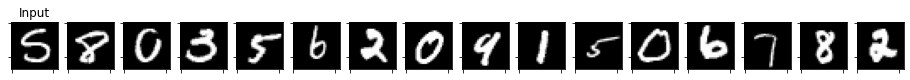

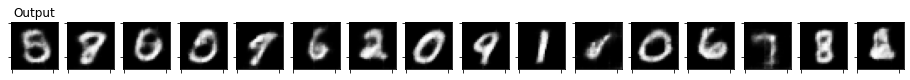

train_mse[8] = 0.032349740055964346
train_mmd[8] = 0.0030668223157842107
train_loss[8] = 0.03388315122970875
test_mse[8] = 0.031442124675959346
test_mmd[8] = 0.0038141727447509764
test_loss[8] = 0.03334921095520258



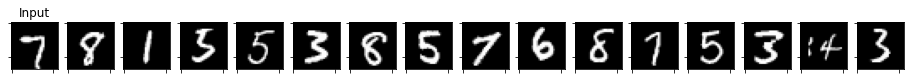

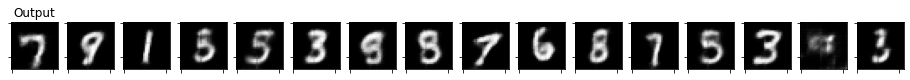

train_mse[9] = 0.031200012049459398
train_mmd[9] = 0.0030594531525956824
train_loss[9] = 0.032729738562348044
test_mse[9] = 0.03017115141265094
test_mmd[9] = 0.004342424869537354
test_loss[9] = 0.032342363893985746



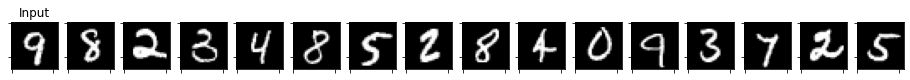

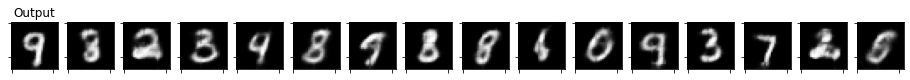

train_mse[10] = 0.0301289216793598
train_mmd[10] = 0.003028212709629789
train_loss[10] = 0.031643028097583896
test_mse[10] = 0.0291036045178771
test_mmd[10] = 0.003322288393974304
test_loss[10] = 0.030764748714864253



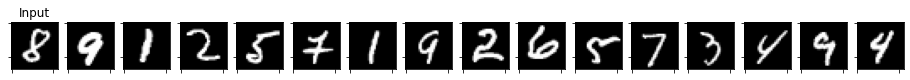

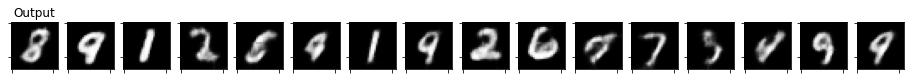

train_mse[11] = 0.02916933091238458
train_mmd[11] = 0.002844659318315222
train_loss[11] = 0.03059166060324679
test_mse[11] = 0.0287361322902143
test_mmd[11] = 0.004535898566246033
test_loss[11] = 0.031004081619903444



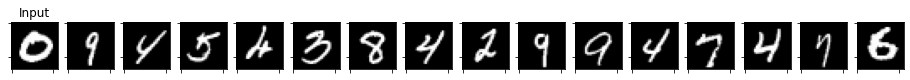

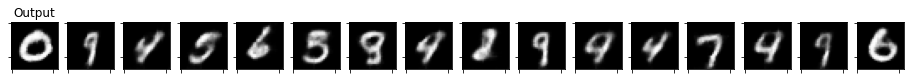

train_mse[12] = 0.028497770064054653
train_mmd[12] = 0.002840078130681464
train_loss[12] = 0.029917809089764637
test_mse[12] = 0.027630200469866396
test_mmd[12] = 0.0034185439348220826
test_loss[12] = 0.029339472483843564



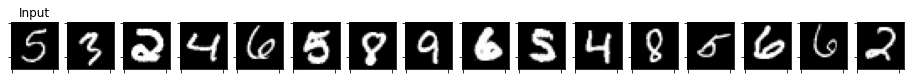

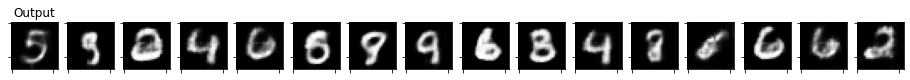

train_mse[13] = 0.02783846004687725
train_mmd[13] = 0.0027895678865148665
train_loss[13] = 0.029233243974282386
test_mse[13] = 0.027119896560907363
test_mmd[13] = 0.0038279980421066285
test_loss[13] = 0.02903389553539455



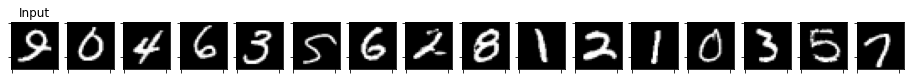

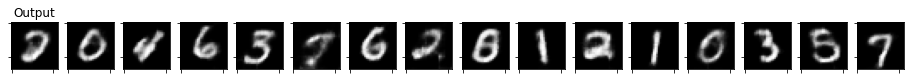

train_mse[14] = 0.02730233647880402
train_mmd[14] = 0.002808071197347438
train_loss[14] = 0.02870637206955159
test_mse[14] = 0.02664023544639349
test_mmd[14] = 0.003185480833053589
test_loss[14] = 0.028232975862920284



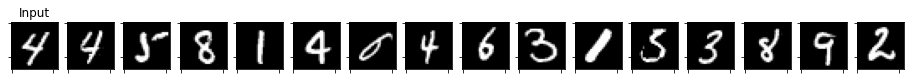

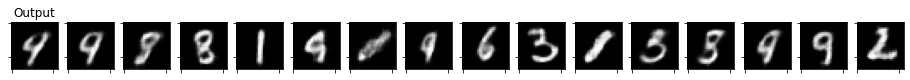

train_mse[15] = 0.026864786564986757
train_mmd[15] = 0.002747819271493465
train_loss[15] = 0.02823869620073349
test_mse[15] = 0.026224516239017247
test_mmd[15] = 0.004171156883239746
test_loss[15] = 0.02831009468063712



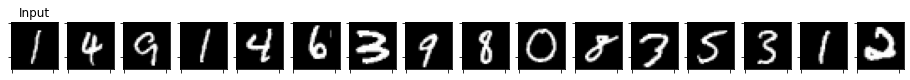

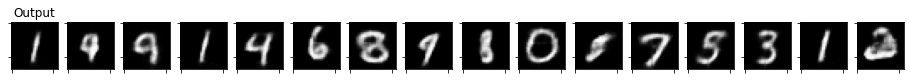

train_mse[16] = 0.026418669688257766
train_mmd[16] = 0.0026236726882609917
train_loss[16] = 0.02773050604031441
test_mse[16] = 0.026012015901505946
test_mmd[16] = 0.004080772399902344
test_loss[16] = 0.028052402101457118



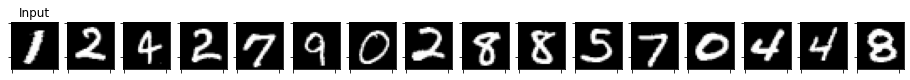

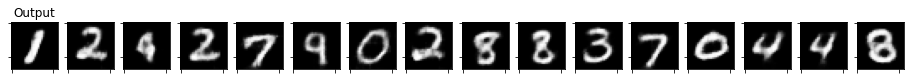

train_mse[17] = 0.026087193492245166
train_mmd[17] = 0.0027875702431861393
train_loss[17] = 0.027480978613838237
test_mse[17] = 0.025615586107596754
test_mmd[17] = 0.00336892306804657
test_loss[17] = 0.02730004764162004



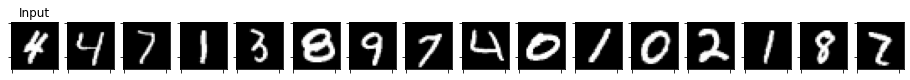

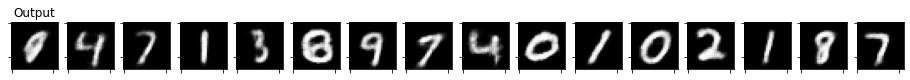

train_mse[18] = 0.02574122024184846
train_mmd[18] = 0.0026930154638087496
train_loss[18] = 0.027087727973752834
test_mse[18] = 0.025175530510023237
test_mmd[18] = 0.003385058045387268
test_loss[18] = 0.02686805953271687



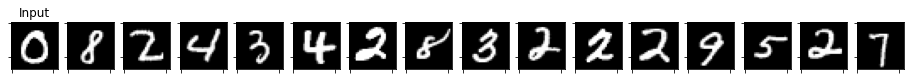

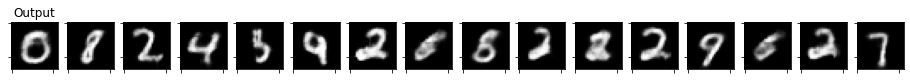

train_mse[19] = 0.02547821097392985
train_mmd[19] = 0.0027034130502254406
train_loss[19] = 0.026829917499042573
test_mse[19] = 0.025113320769742133
test_mmd[19] = 0.0032798200845718384
test_loss[19] = 0.026753230765461922



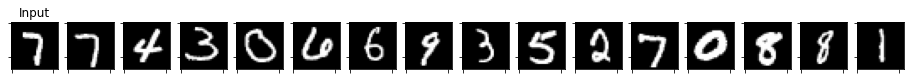

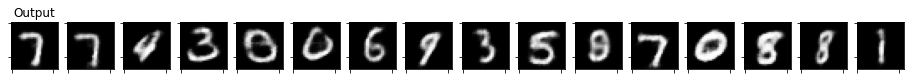

train_mse[20] = 0.02518381030952677
train_mmd[20] = 0.002518770035277022
train_loss[20] = 0.02644319532716528
test_mse[20] = 0.024733553221449257
test_mmd[20] = 0.0030105084180831907
test_loss[20] = 0.02623880738392472



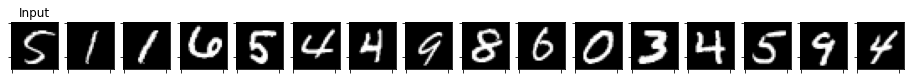

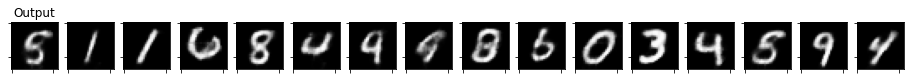

train_mse[21] = 0.024967516292916967
train_mmd[21] = 0.0025219673806048453
train_loss[21] = 0.02622849998321939
test_mse[21] = 0.024158670846372843
test_mmd[21] = 0.0032077252864837645
test_loss[21] = 0.025762533443048595



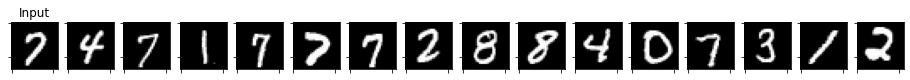

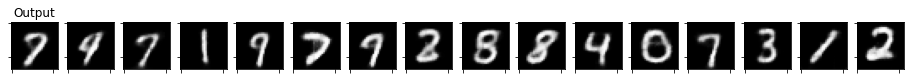

train_mse[22] = 0.024710800459093237
train_mmd[22] = 0.002510458357790683
train_loss[22] = 0.025966029637988577
test_mse[22] = 0.02420882652513683
test_mmd[22] = 0.0027989774942398073
test_loss[22] = 0.02560831531882286



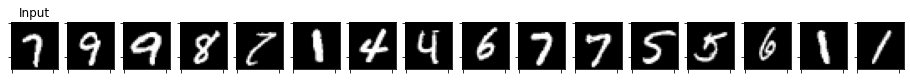

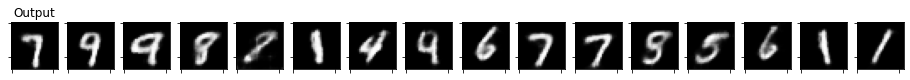

train_mse[23] = 0.02455290397430988
train_mmd[23] = 0.002539827975820988
train_loss[23] = 0.025822817962220374
test_mse[23] = 0.023977778619155288
test_mmd[23] = 0.0030632078647613525
test_loss[23] = 0.025509382551535963



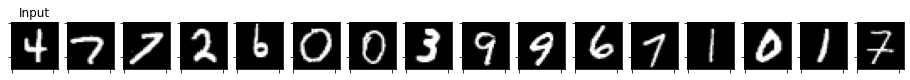

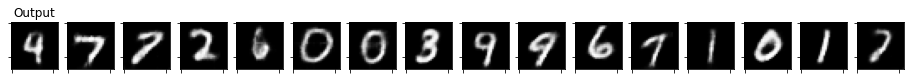

train_mse[24] = 0.024286892098632263
train_mmd[24] = 0.002491323491360279
train_loss[24] = 0.025532553844312404
test_mse[24] = 0.024102874286472797
test_mmd[24] = 0.0028172463178634645
test_loss[24] = 0.02551149744540453



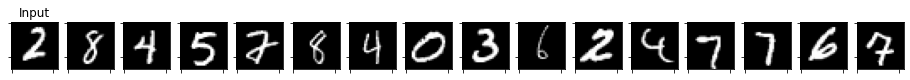

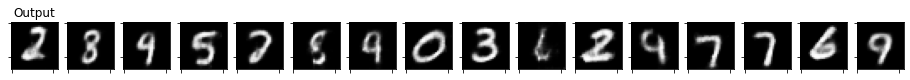

train_mse[25] = 0.024109371268051735
train_mmd[25] = 0.00237617441948424
train_loss[25] = 0.025297458477793855
test_mse[25] = 0.02396493605338037
test_mmd[25] = 0.0038229525089263916
test_loss[25] = 0.025876412354409694



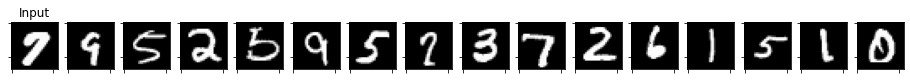

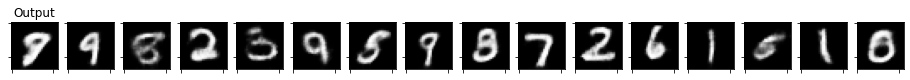

train_mse[26] = 0.023973023550624542
train_mmd[26] = 0.002386289454521017
train_loss[26] = 0.02516616827788505
test_mse[26] = 0.023519233101978898
test_mmd[26] = 0.0028780490159988404
test_loss[26] = 0.02495825760997832



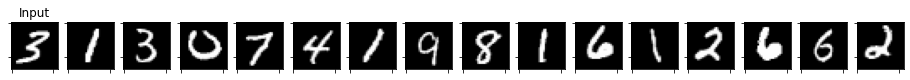

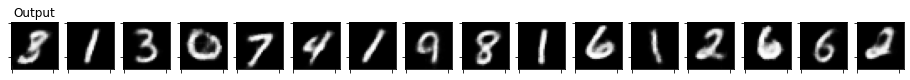

train_mse[27] = 0.023824531735574944
train_mmd[27] = 0.002409417578514586
train_loss[27] = 0.025029240524832238
test_mse[27] = 0.023344859341159464
test_mmd[27] = 0.002802079916000366
test_loss[27] = 0.024745899252593517



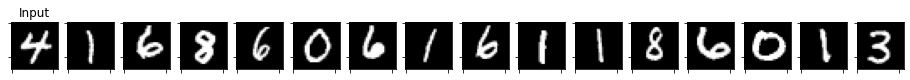

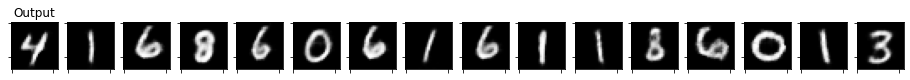

train_mse[28] = 0.023634510384278093
train_mmd[28] = 0.002266188885303254
train_loss[28] = 0.02476760482692972
test_mse[28] = 0.02347737979143858
test_mmd[28] = 0.002697855234146118
test_loss[28] = 0.02482630740851164



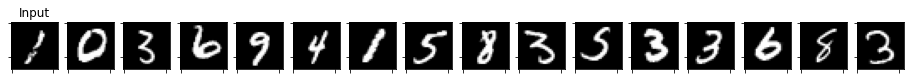

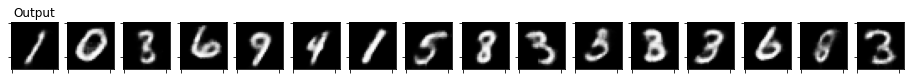

train_mse[29] = 0.0235253817699057
train_mmd[29] = 0.002330702416440274
train_loss[29] = 0.024690732978125837
test_mse[29] = 0.023511504335328937
test_mmd[29] = 0.003522816300392151
test_loss[29] = 0.02527291248552501



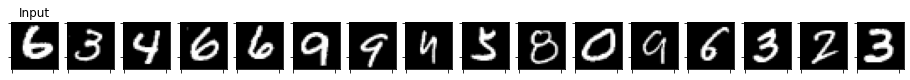

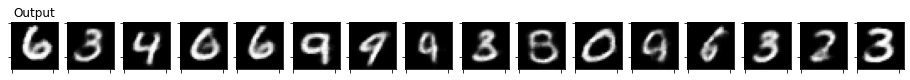

train_mse[30] = 0.023412553656925548
train_mmd[30] = 0.0023520880557121116
train_loss[30] = 0.024588597684781603
test_mse[30] = 0.02283430560491979
test_mmd[30] = 0.003255179524421692
test_loss[30] = 0.024461895413696765



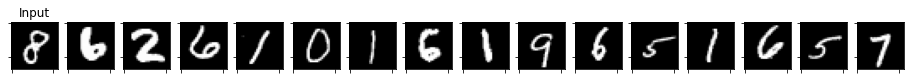

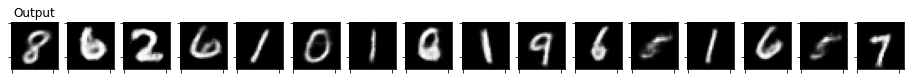

train_mse[31] = 0.02328382377770353
train_mmd[31] = 0.002338811691771162
train_loss[31] = 0.02445322962358911
test_mse[31] = 0.023135955352336167
test_mmd[31] = 0.0028398871421813966
test_loss[31] = 0.024555898876860736



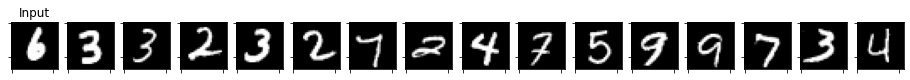

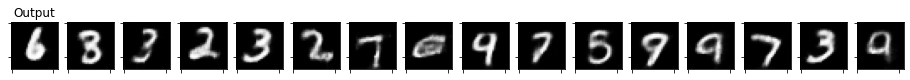

train_mse[32] = 0.02315293477570757
train_mmd[32] = 0.002269983798899549
train_loss[32] = 0.024287926675157345
test_mse[32] = 0.022682658722624184
test_mmd[32] = 0.003084370493888855
test_loss[32] = 0.02422484396956861



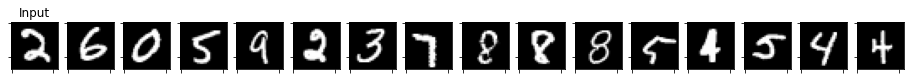

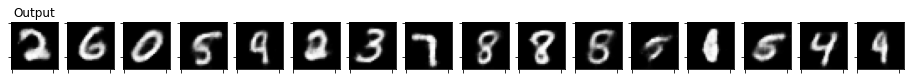

train_mse[33] = 0.023037145691032105
train_mmd[33] = 0.0021755390978874046
train_loss[33] = 0.024124915239975807
test_mse[33] = 0.02270021620206535
test_mmd[33] = 0.0030284345149993895
test_loss[33] = 0.024214433459565043



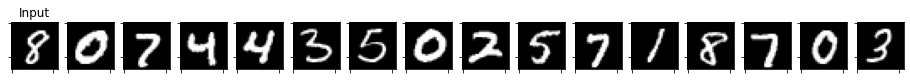

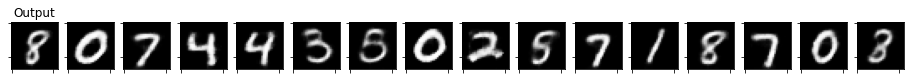

train_mse[34] = 0.02292873406029762
train_mmd[34] = 0.0021533722573138297
train_loss[34] = 0.024005420188954536
test_mse[34] = 0.023021696647629143
test_mmd[34] = 0.0026013672351837156
test_loss[34] = 0.024322380265221



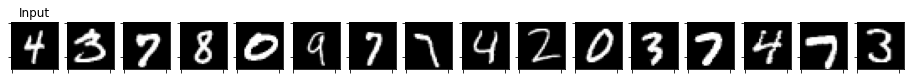

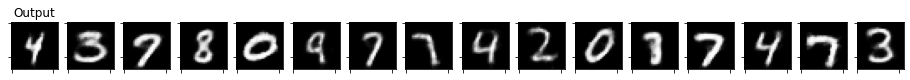

train_mse[35] = 0.02283108354882991
train_mmd[35] = 0.002074579989656489
train_loss[35] = 0.023868373543658155
test_mse[35] = 0.022576047433540226
test_mmd[35] = 0.003060773015022278
test_loss[35] = 0.024106433894485236



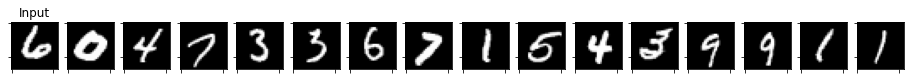

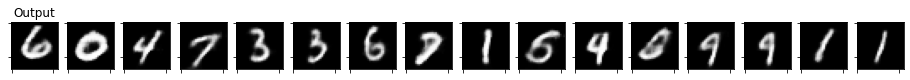

train_mse[36] = 0.022743817434666004
train_mmd[36] = 0.002155473384451359
train_loss[36] = 0.023821554126891683
test_mse[36] = 0.02230469617061317
test_mmd[36] = 0.0024784505367279053
test_loss[36] = 0.02354392148554325



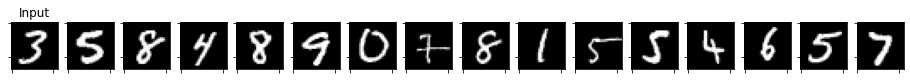

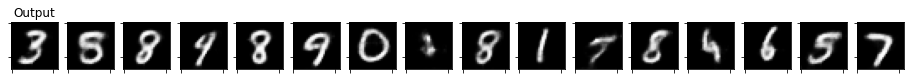

train_mse[37] = 0.022679833893446213
train_mmd[37] = 0.0022609619384116315
train_loss[37] = 0.02381031486265203
test_mse[37] = 0.022294408082962035
test_mmd[37] = 0.002552047371864319
test_loss[37] = 0.023570431722328068



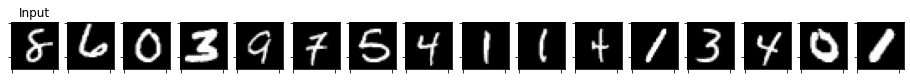

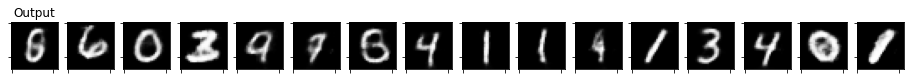

train_mse[38] = 0.022591796477741382
train_mmd[38] = 0.002222088042725908
train_loss[38] = 0.023702840499104337
test_mse[38] = 0.02221503243781626
test_mmd[38] = 0.0027008265256881713
test_loss[38] = 0.02356544565409422



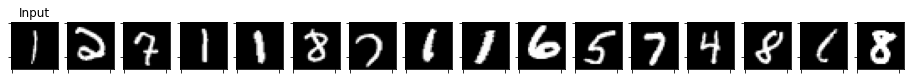

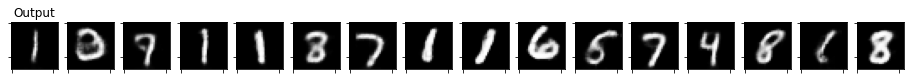

train_mse[39] = 0.02252701587499456
train_mmd[39] = 0.0021909840563510328
train_loss[39] = 0.023622507903170078
test_mse[39] = 0.022181621007621288
test_mmd[39] = 0.0028899461030960083
test_loss[39] = 0.023626594059169292



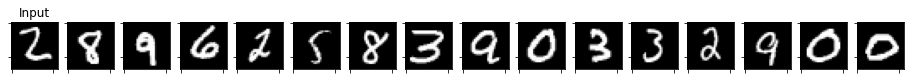

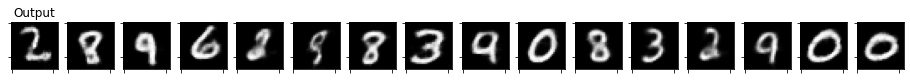

train_mse[40] = 0.022451940202649602
train_mmd[40] = 0.0021103092964659346
train_loss[40] = 0.023507094850882572
test_mse[40] = 0.02217013812623918
test_mmd[40] = 0.003345942497253418
test_loss[40] = 0.02384310937486589



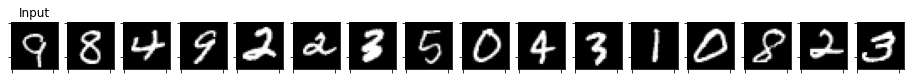

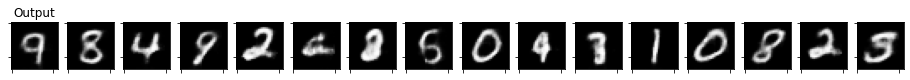

train_mse[41] = 0.02235188581683534
train_mmd[41] = 0.002160421330878075
train_loss[41] = 0.02343209648227438
test_mse[41] = 0.02238997113890946
test_mmd[41] = 0.002758273482322693
test_loss[41] = 0.023769107880070806



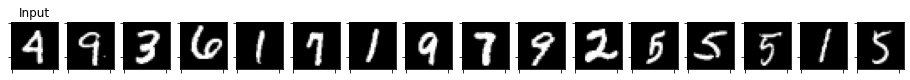

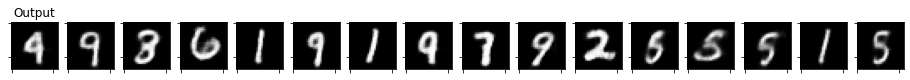

train_mse[42] = 0.022284595311639156
train_mmd[42] = 0.0021134538853422122
train_loss[42] = 0.02334132225431026
test_mse[42] = 0.022119501838460565
test_mmd[42] = 0.00319119393825531
test_loss[42] = 0.02371509885415435



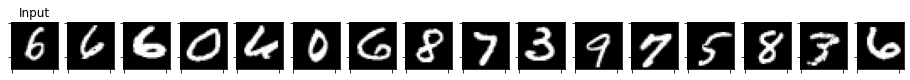

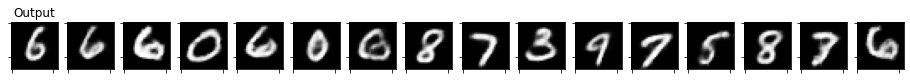

train_mse[43] = 0.022180401787478873
train_mmd[43] = 0.0021065093101339137
train_loss[43] = 0.023233656442545828
test_mse[43] = 0.02175740054808557
test_mmd[43] = 0.0035957366228103636
test_loss[43] = 0.023555268812924624



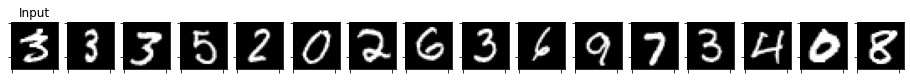

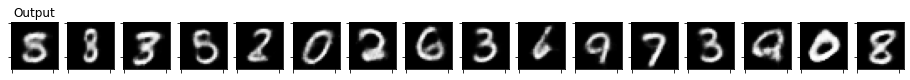

train_mse[44] = 0.022111605416904104
train_mmd[44] = 0.0021232939781026636
train_loss[44] = 0.023173252405955438
test_mse[44] = 0.02192765483632684
test_mmd[44] = 0.0034332573413848877
test_loss[44] = 0.023644283507019283



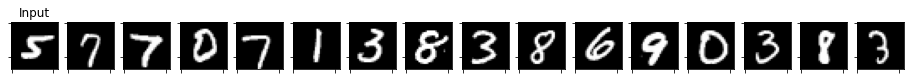

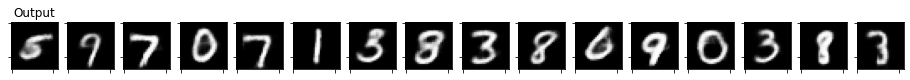

train_mse[45] = 0.02206795128419044
train_mmd[45] = 0.0020791211026780147
train_loss[45] = 0.02310751183552945
test_mse[45] = 0.021709179645404218
test_mmd[45] = 0.0030182093381881715
test_loss[45] = 0.023218284267932175



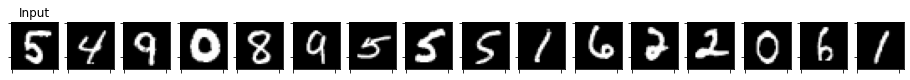

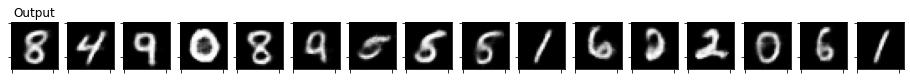

train_mse[46] = 0.02200193928277239
train_mmd[46] = 0.002073335647583008
train_loss[46] = 0.023038607106563892
test_mse[46] = 0.021974942553788422
test_mmd[46] = 0.0026187866926193236
test_loss[46] = 0.023284335900098086



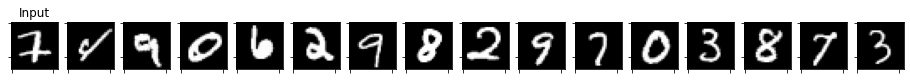

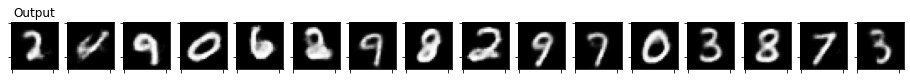

train_mse[47] = 0.022005973526454985
train_mmd[47] = 0.002186908113195541
train_loss[47] = 0.023099427583052758
test_mse[47] = 0.02164959879592061
test_mmd[47] = 0.002394244074821472
test_loss[47] = 0.022846720833331346



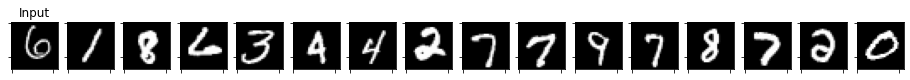

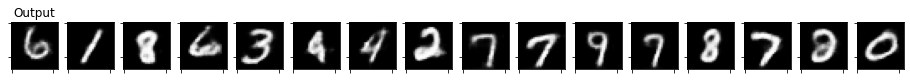

train_mse[48] = 0.021867986213653646
train_mmd[48] = 0.002099208121604108
train_loss[48] = 0.0229175902744557
test_mse[48] = 0.021714132651686667
test_mmd[48] = 0.0027580499649047852
test_loss[48] = 0.02309315763413906



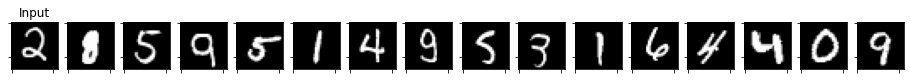

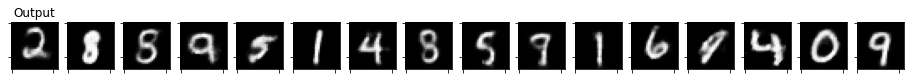

train_mse[49] = 0.021803738470090196
train_mmd[49] = 0.0019282924368026408
train_loss[49] = 0.022767884688491516
test_mse[49] = 0.021668439777567983
test_mmd[49] = 0.0029371440410614013
test_loss[49] = 0.023137011844664813



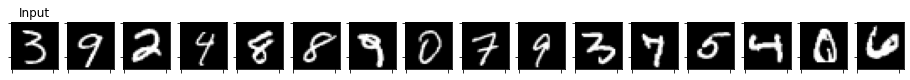

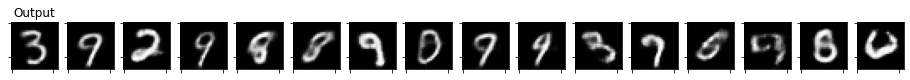

train_mse[50] = 0.021774859480718348
train_mmd[50] = 0.0020518556554266747
train_loss[50] = 0.022800787308431686
test_mse[50] = 0.021410361211746932
test_mmd[50] = 0.0031583696603775025
test_loss[50] = 0.022989546041935684



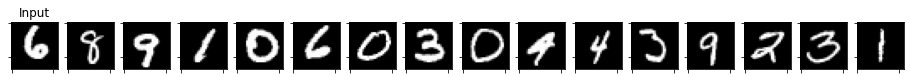

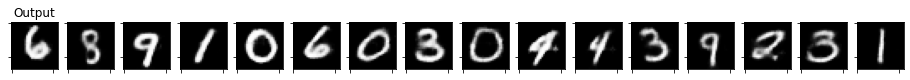

train_mse[51] = 0.021777007966599565
train_mmd[51] = 0.002113525410915943
train_loss[51] = 0.022833770672057538
test_mse[51] = 0.02146389875560999
test_mmd[51] = 0.0026599228382110595
test_loss[51] = 0.02279386012814939



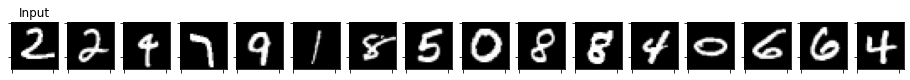

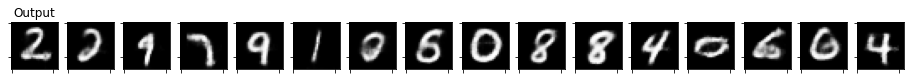

train_mse[52] = 0.021676112529128155
train_mmd[52] = 0.0021109509975352184
train_loss[52] = 0.022731588027895766
test_mse[52] = 0.021334904385730623
test_mmd[52] = 0.004105532169342041
test_loss[52] = 0.023387670423835515



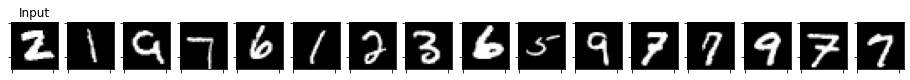

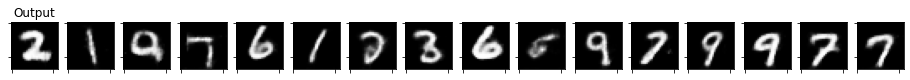

train_mse[53] = 0.021623564598725196
train_mmd[53] = 0.0020117475631389213
train_loss[53] = 0.02262943838029466
test_mse[53] = 0.02150618419982493
test_mmd[53] = 0.0030234634876251222
test_loss[53] = 0.02301791599020362



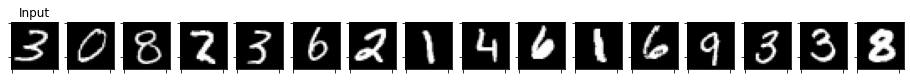

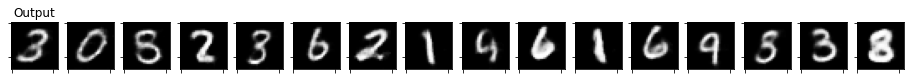

train_mse[54] = 0.02160128799683236
train_mmd[54] = 0.0020445108413696287
train_loss[54] = 0.022623543417517177
test_mse[54] = 0.02114594946615398
test_mmd[54] = 0.0026218831539154054
test_loss[54] = 0.02245689104311168



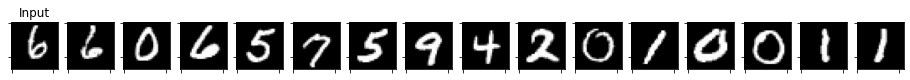

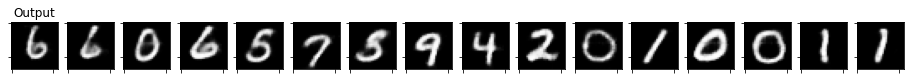

train_mse[55] = 0.02156982253048014
train_mmd[55] = 0.0020336014159182286
train_loss[55] = 0.022586623238439255
test_mse[55] = 0.02137259403243661
test_mmd[55] = 0.002371448278427124
test_loss[55] = 0.02255831817165017



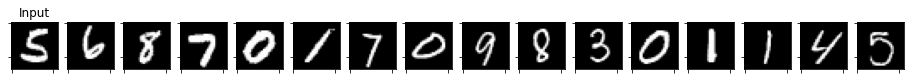

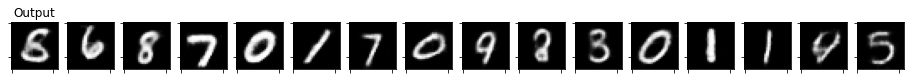

train_mse[56] = 0.0214970330133083
train_mmd[56] = 0.0020644035745174326
train_loss[56] = 0.022529234800567018
test_mse[56] = 0.02107563177123666
test_mmd[56] = 0.0028212159872055055
test_loss[56] = 0.022486239764839412



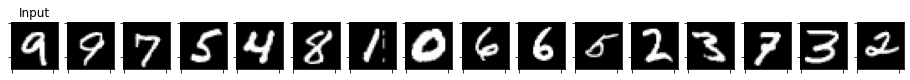

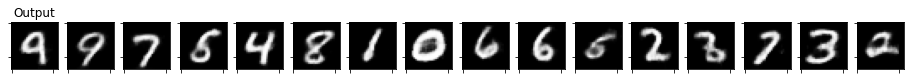

train_mse[57] = 0.021484582482817326
train_mmd[57] = 0.0021075892955698867
train_loss[57] = 0.022538377130602267
test_mse[57] = 0.021014419058337806
test_mmd[57] = 0.0029644668102264404
test_loss[57] = 0.022496652463451026



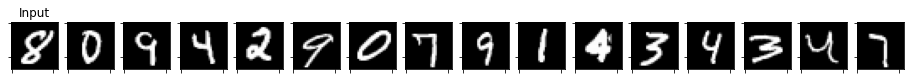

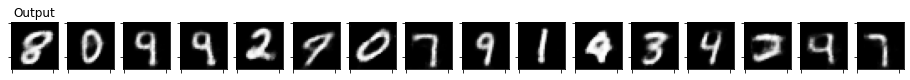

train_mse[58] = 0.021394425749461703
train_mmd[58] = 0.0020834451026104867
train_loss[58] = 0.022436148300766946
test_mse[58] = 0.02105046100914478
test_mmd[58] = 0.0026241421699523928
test_loss[58] = 0.02236253209412098



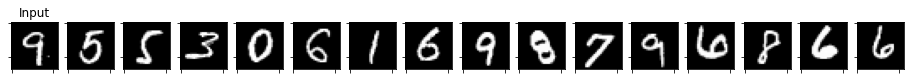

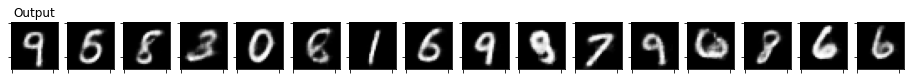

train_mse[59] = 0.021379732554580304
train_mmd[59] = 0.0020429641642469042
train_loss[59] = 0.022401214636703755
test_mse[59] = 0.02108919178135693
test_mmd[59] = 0.00262891948223114
test_loss[59] = 0.02240365156903863



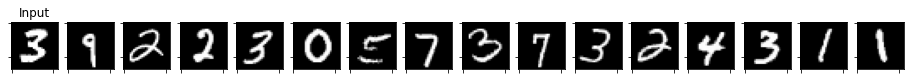

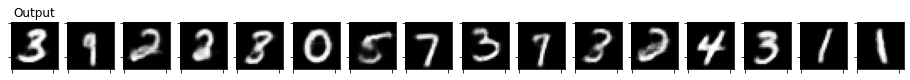

train_mse[60] = 0.021358302029523445
train_mmd[60] = 0.0020474428826190057
train_loss[60] = 0.022382023470832946
test_mse[60] = 0.020975806377828123
test_mmd[60] = 0.0031354427337646484
test_loss[60] = 0.022543527744710447



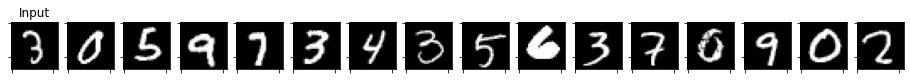

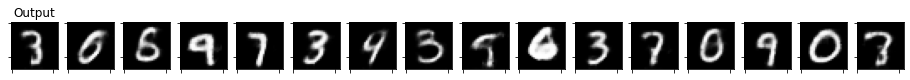

train_mse[61] = 0.021293382021657963
train_mmd[61] = 0.00200520728496795
train_loss[61] = 0.02229598566414194
test_mse[61] = 0.02126191328279674
test_mmd[61] = 0.002807760238647461
test_loss[61] = 0.022665793402120472



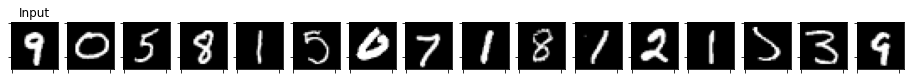

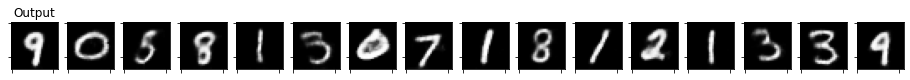

train_mse[62] = 0.021259174242298652
train_mmd[62] = 0.0019465116744345806
train_loss[62] = 0.022232430079515943
test_mse[62] = 0.020873036189004778
test_mmd[62] = 0.002570679783821106
test_loss[62] = 0.02215837612748146



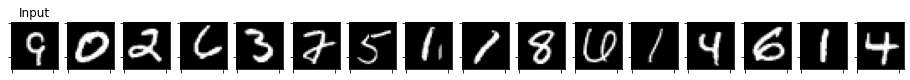

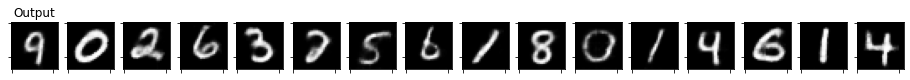

train_mse[63] = 0.02118568500464267
train_mmd[63] = 0.002080474508569596
train_loss[63] = 0.02222592225892747
test_mse[63] = 0.021032449416816236
test_mmd[63] = 0.0027649372816085814
test_loss[63] = 0.022414918104186655



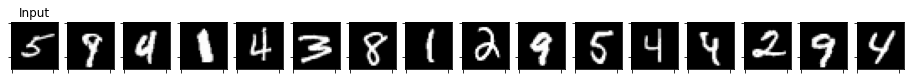

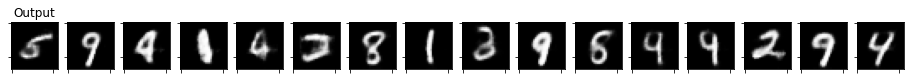

train_mse[64] = 0.021202581336206578
train_mmd[64] = 0.0020805521214261966
train_loss[64] = 0.022242857396919676
test_mse[64] = 0.02091524451971054
test_mmd[64] = 0.0032112270593643187
test_loss[64] = 0.02252085800282657



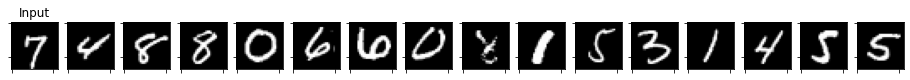

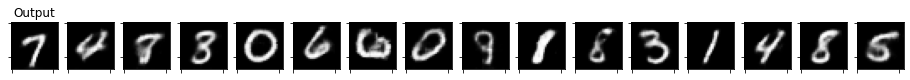

train_mse[65] = 0.021125380274780253
train_mmd[65] = 0.0020297273676446142
train_loss[65] = 0.02214024395860256
test_mse[65] = 0.020987993711605667
test_mmd[65] = 0.004560166597366333
test_loss[65] = 0.023268076963722704



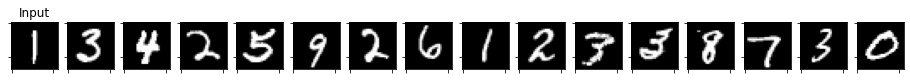

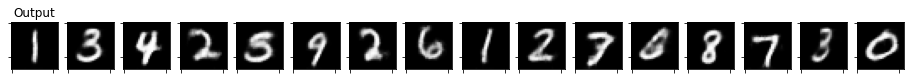

train_mse[66] = 0.02115256818051034
train_mmd[66] = 0.002077467390831481
train_loss[66] = 0.02219130187592608
test_mse[66] = 0.020835703052580357
test_mmd[66] = 0.003831842541694641
test_loss[66] = 0.02275162432342768



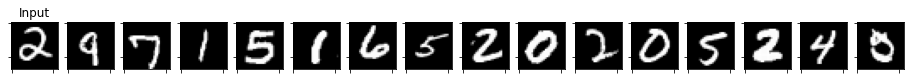

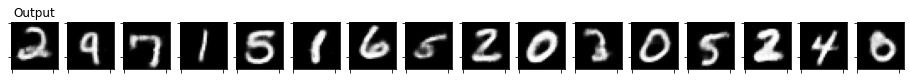

train_mse[67] = 0.02112151602322751
train_mmd[67] = 0.002105864565423194
train_loss[67] = 0.022174448305939107
test_mse[67] = 0.02080173557624221
test_mmd[67] = 0.003816381096839905
test_loss[67] = 0.02270992617122829



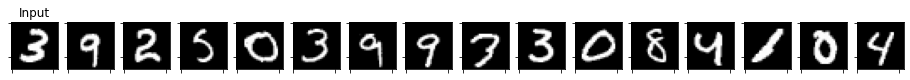

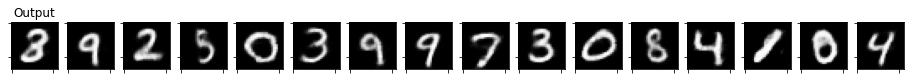

train_mse[68] = 0.021033816943143276
train_mmd[68] = 0.002012371002359593
train_loss[68] = 0.022040002444323074
test_mse[68] = 0.020630165841430424
test_mmd[68] = 0.002782145142555237
test_loss[68] = 0.022021238412708043



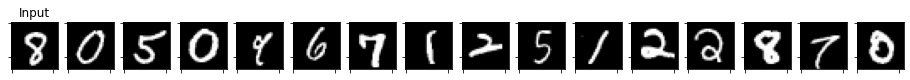

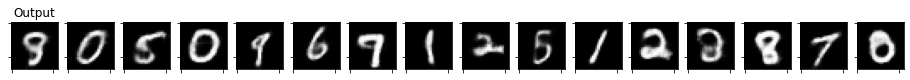

train_mse[69] = 0.02103789930647992
train_mmd[69] = 0.0021731473029928004
train_loss[69] = 0.022124472957976322
test_mse[69] = 0.020735065545886756
test_mmd[69] = 0.0034309148788452147
test_loss[69] = 0.022450523031875492



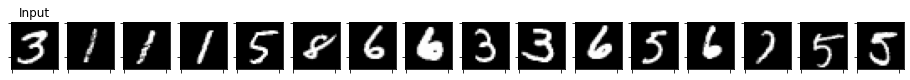

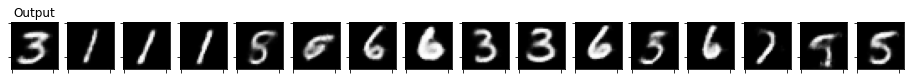

train_mse[70] = 0.02094998561004375
train_mmd[70] = 0.0019901514053344725
train_loss[70] = 0.021945061312710984
test_mse[70] = 0.02053225114941597
test_mmd[70] = 0.002752944827079773
test_loss[70] = 0.021908723562955857



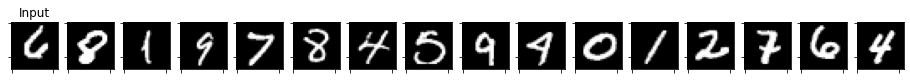

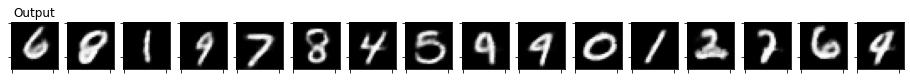

train_mse[71] = 0.02094474956393242
train_mmd[71] = 0.0019997322812993477
train_loss[71] = 0.02194461570458209
test_mse[71] = 0.020552979642525317
test_mmd[71] = 0.0025590986013412477
test_loss[71] = 0.02183252894319594



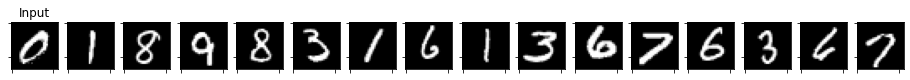

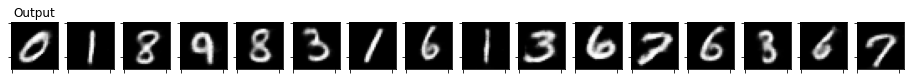

train_mse[72] = 0.02091536672508463
train_mmd[72] = 0.002030611038208008
train_loss[72] = 0.021930672244188633
test_mse[72] = 0.02061067628674209
test_mmd[72] = 0.0024253815412521363
test_loss[72] = 0.02182336705736816



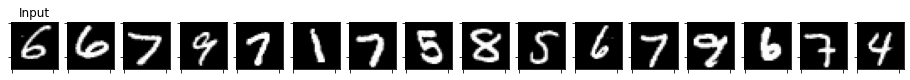

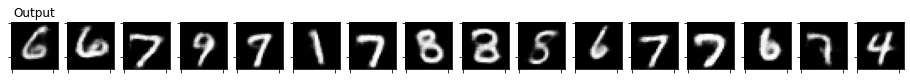

train_mse[73] = 0.02086480364520499
train_mmd[73] = 0.0021561003745870387
train_loss[73] = 0.02194285383249851
test_mse[73] = 0.020568431029096244
test_mmd[73] = 0.002520751953125
test_loss[73] = 0.021828807005658746



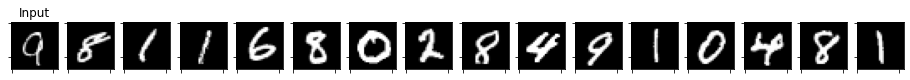

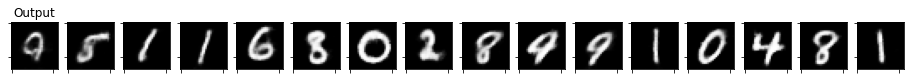

train_mse[74] = 0.02093487985115102
train_mmd[74] = 0.002147411285562718
train_loss[74] = 0.02200858549393238
test_mse[74] = 0.020596466865390538
test_mmd[74] = 0.003304821252822876
test_loss[74] = 0.022248877538368107



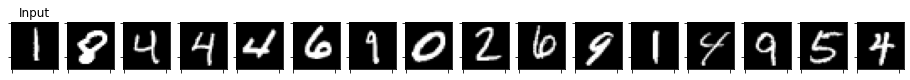

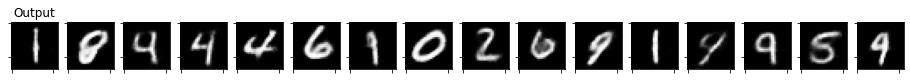

train_mse[75] = 0.02087912339954934
train_mmd[75] = 0.0021033885631155463
train_loss[75] = 0.021930817681107117
test_mse[75] = 0.020722128544002773
test_mmd[75] = 0.002391001582145691
test_loss[75] = 0.021917629335075618



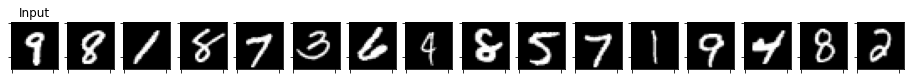

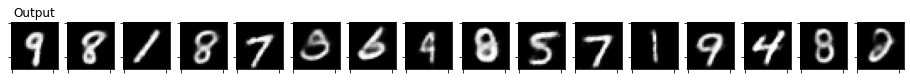

train_mse[76] = 0.020785589254599935
train_mmd[76] = 0.0020846341518645593
train_loss[76] = 0.021827906330532217
test_mse[76] = 0.02058585179038346
test_mmd[76] = 0.003245428204536438
test_loss[76] = 0.022208565892651678



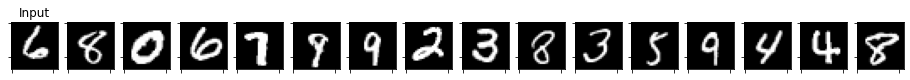

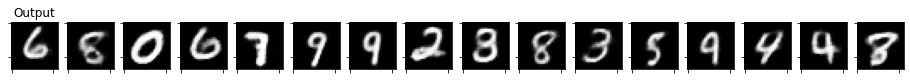

train_mse[77] = 0.020734828227060905
train_mmd[77] = 0.0019656049444320353
train_loss[77] = 0.021717630699276923
test_mse[77] = 0.020501006743870676
test_mmd[77] = 0.0033870309591293333
test_loss[77] = 0.022194522200152278



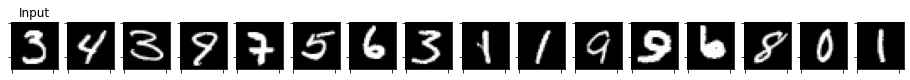

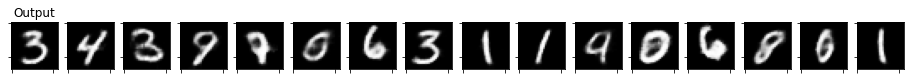

train_mse[78] = 0.020784471691288848
train_mmd[78] = 0.002141856132669652
train_loss[78] = 0.021855399757623673
test_mse[78] = 0.02090617106296122
test_mmd[78] = 0.003734201192855835
test_loss[78] = 0.022773271659389138



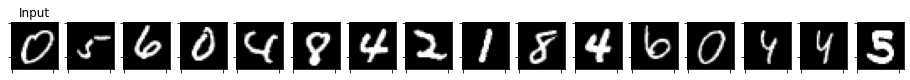

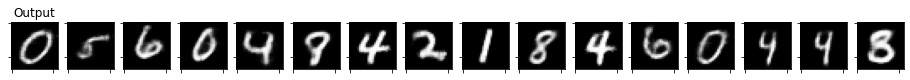

train_mse[79] = 0.020682947258365916
train_mmd[79] = 0.00204934465124252
train_loss[79] = 0.021707619583987176
test_mse[79] = 0.0206184224691242
test_mmd[79] = 0.003230944275856018
test_loss[79] = 0.022233894607052208



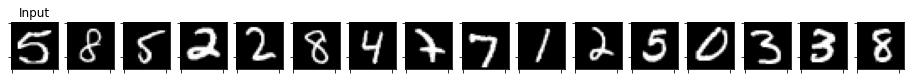

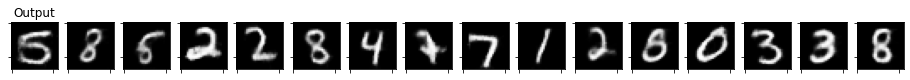

train_mse[80] = 0.020764059882531775
train_mmd[80] = 0.002200581672343802
train_loss[80] = 0.021864350718703674
test_mse[80] = 0.020546846697106956
test_mmd[80] = 0.0030833274126052857
test_loss[80] = 0.0220885104034096



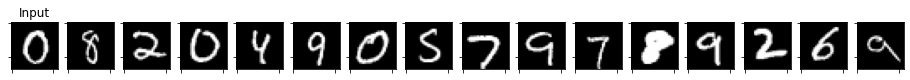

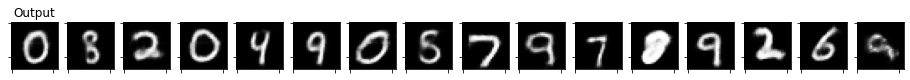

train_mse[81] = 0.02066297005624213
train_mmd[81] = 0.0020444504758144947
train_loss[81] = 0.02168519529414938
test_mse[81] = 0.020535407587885857
test_mmd[81] = 0.00393875539302826
test_loss[81] = 0.022504785284399986



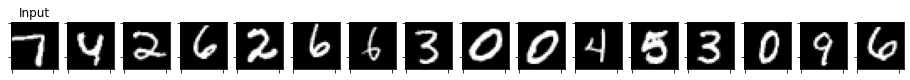

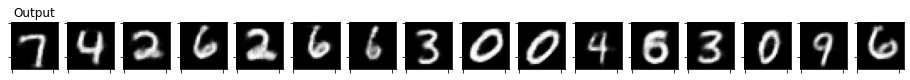

train_mse[82] = 0.020648462959426513
train_mmd[82] = 0.002035537171871104
train_loss[82] = 0.021666231545362066
test_mse[82] = 0.02056021229363978
test_mmd[82] = 0.0032494574785232543
test_loss[82] = 0.022184941032901407



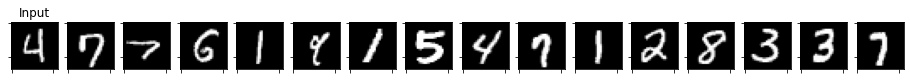

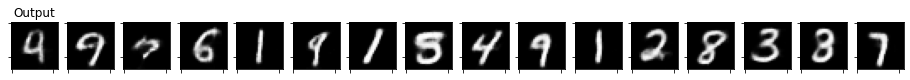

train_mse[83] = 0.020582693426849995
train_mmd[83] = 0.0020147810591028092
train_loss[83] = 0.0215900839564014
test_mse[83] = 0.020342520205304027
test_mmd[83] = 0.0035380959510803224
test_loss[83] = 0.02211156818084419



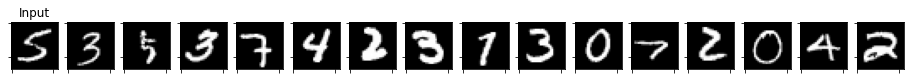

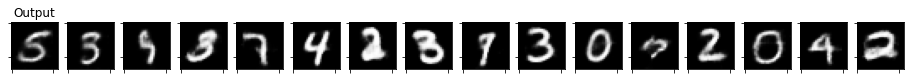

train_mse[84] = 0.02064721345742966
train_mmd[84] = 0.002189183235168457
train_loss[84] = 0.02174180507501389
test_mse[84] = 0.02048007263801992
test_mmd[84] = 0.0033316701650619508
test_loss[84] = 0.022145907720550896



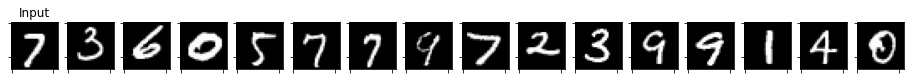

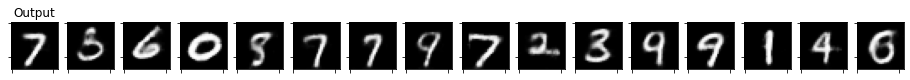

train_mse[85] = 0.020570388222311404
train_mmd[85] = 0.002110681635268191
train_loss[85] = 0.0216257290399455
test_mse[85] = 0.02022284003905952
test_mmd[85] = 0.0028707027435302735
test_loss[85] = 0.021658191410824656



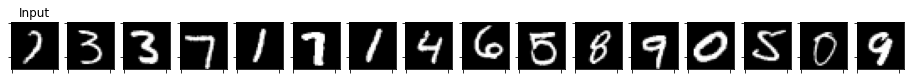

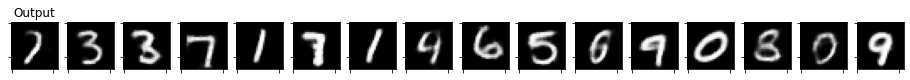

train_mse[86] = 0.020523328112160906
train_mmd[86] = 0.0019893144039397543
train_loss[86] = 0.021517985314130784
test_mse[86] = 0.020391348749399185
test_mmd[86] = 0.002679583430290222
test_loss[86] = 0.021731140464544295



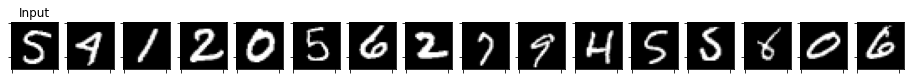

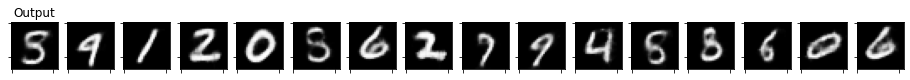

train_mse[87] = 0.020453621653166224
train_mmd[87] = 0.0019997464849593792
train_loss[87] = 0.02145349489564591
test_mse[87] = 0.020231690583750607
test_mmd[87] = 0.002738812565803528
test_loss[87] = 0.021601096820086242



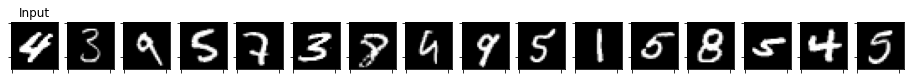

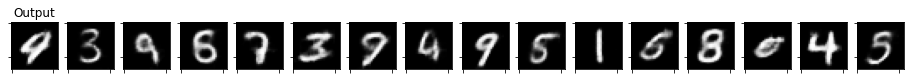

train_mse[88] = 0.02047858102683057
train_mmd[88] = 0.002093660070541057
train_loss[88] = 0.0215254110621011
test_mse[88] = 0.020331923477351667
test_mmd[88] = 0.002653786540031433
test_loss[88] = 0.021658816700801255



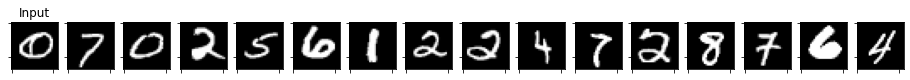

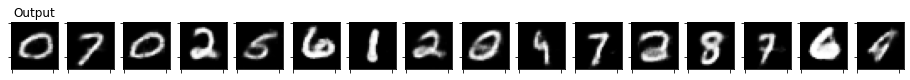

train_mse[89] = 0.02049294259161391
train_mmd[89] = 0.0020734472477689702
train_loss[89] = 0.021529666215498396
test_mse[89] = 0.020297974441200496
test_mmd[89] = 0.002195170521736145
test_loss[89] = 0.021395559702068568



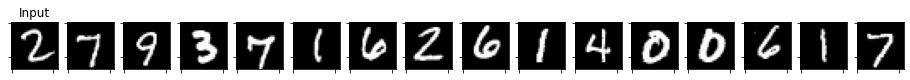

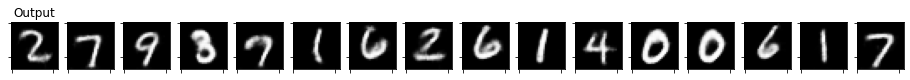

train_mse[90] = 0.020408211252156725
train_mmd[90] = 0.001903977799922862
train_loss[90] = 0.021360200152118154
test_mse[90] = 0.020221970835700633
test_mmd[90] = 0.002572616934776306
test_loss[90] = 0.021508279349654914



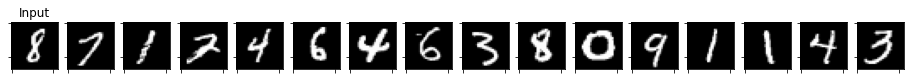

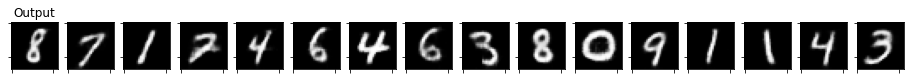

train_mse[91] = 0.020429347138455574
train_mmd[91] = 0.002044358659297862
train_loss[91] = 0.021451526468104505
test_mse[91] = 0.0201645668130368
test_mmd[91] = 0.0035404473543167113
test_loss[91] = 0.021934790490195154



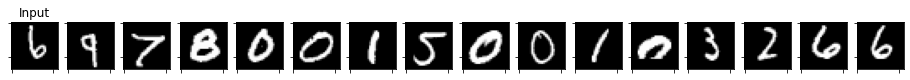

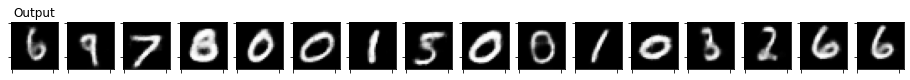

train_mse[92] = 0.020379300486851246
train_mmd[92] = 0.0019216633857564722
train_loss[92] = 0.021340132179729483
test_mse[92] = 0.020150873763486742
test_mmd[92] = 0.0038975894451141356
test_loss[92] = 0.022099668486043812



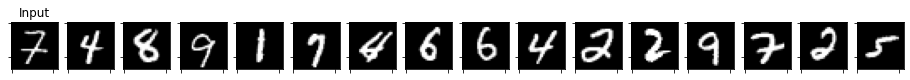

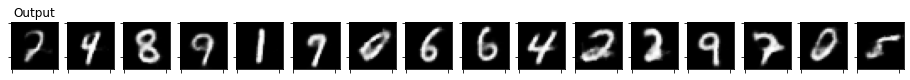

train_mse[93] = 0.020388275575130545
train_mmd[93] = 0.002043444552320115
train_loss[93] = 0.0214099978512906
test_mse[93] = 0.020125689916312695
test_mmd[93] = 0.0025250613689422607
test_loss[93] = 0.021388220600783825



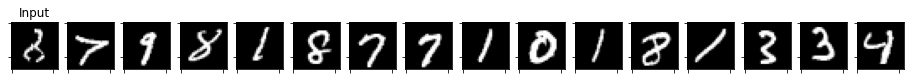

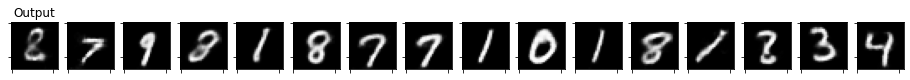

train_mse[94] = 0.020376210810339197
train_mmd[94] = 0.0020799591186198784
train_loss[94] = 0.021416190369649136
test_mse[94] = 0.020129047660157086
test_mmd[94] = 0.002774810791015625
test_loss[94] = 0.021516453055664898



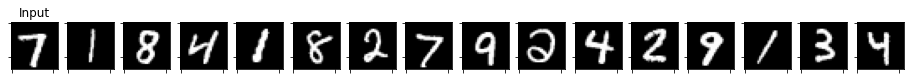

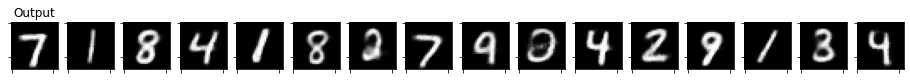

train_mse[95] = 0.02034380796583409
train_mmd[95] = 0.001984347181117281
train_loss[95] = 0.02133598155639273
test_mse[95] = 0.01998058962635696
test_mmd[95] = 0.0027724742889404298
test_loss[95] = 0.021366826770827175



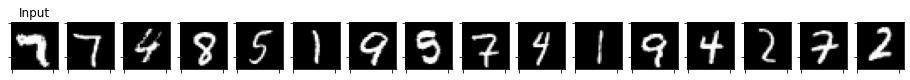

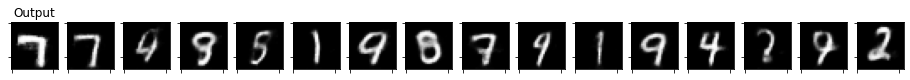

train_mse[96] = 0.02030273273270181
train_mmd[96] = 0.0018809541742852395
train_loss[96] = 0.021243209819844427
test_mse[96] = 0.019887292524799705
test_mmd[96] = 0.003190159797668457
test_loss[96] = 0.021482372470200062



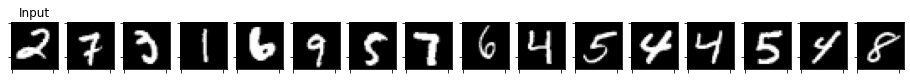

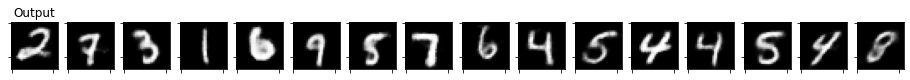

train_mse[97] = 0.020318081594528036
train_mmd[97] = 0.0021269991042766165
train_loss[97] = 0.021381581146666342
test_mse[97] = 0.019949291041120885
test_mmd[97] = 0.00303303599357605
test_loss[97] = 0.02146580899134278



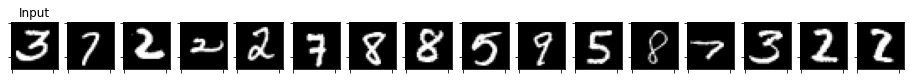

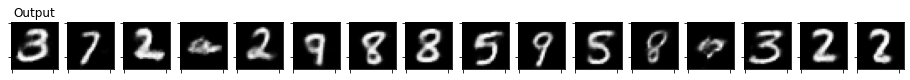

train_mse[98] = 0.020264286967985174
train_mmd[98] = 0.002034920834480448
train_loss[98] = 0.021281747385225397
test_mse[98] = 0.020156605169177055
test_mmd[98] = 0.003570285439491272
test_loss[98] = 0.02194174788892269



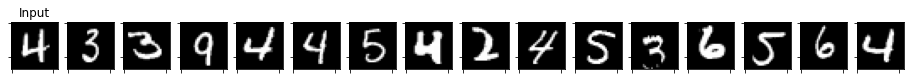

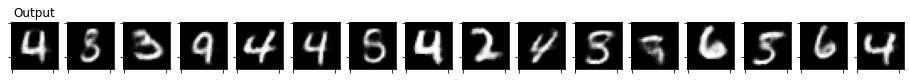

train_mse[99] = 0.02026581979019845
train_mmd[99] = 0.0020406281694452812
train_loss[99] = 0.02128613387492109
test_mse[99] = 0.02034087018109858
test_mmd[99] = 0.003501516580581665
test_loss[99] = 0.022091628424823283



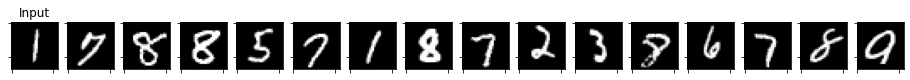

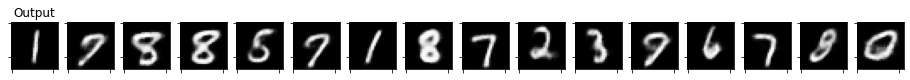

train_mse[100] = 0.02023217760502024
train_mmd[100] = 0.001983881503977674
train_loss[100] = 0.021224118357009075
test_mse[100] = 0.019945607474073767
test_mmd[100] = 0.00276603102684021
test_loss[100] = 0.021328622987493873



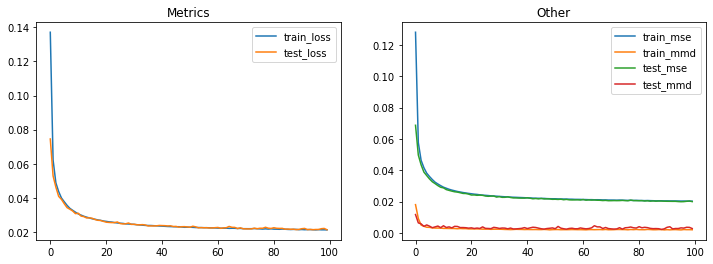

In [2]:
from training import train, MetricsCollector
from vae import VariationalAutoencoder, MmdLoss

vae_mmd, metrics_mmd = train(
    train_ds, test_ds, 
    VariationalAutoencoder(dim=8, stochastic=False), 
    MmdLoss(beta=2e-1),
    epochs=100, lr=1e-3, batch=256,
    metrics=MetricsCollector("mse", "mmd"),
)

In [3]:
from training import save_model
save_model('models/vae_mmd', vae_mmd, metrics_mmd)

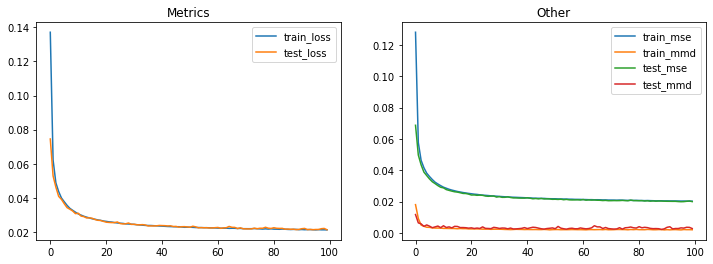

In [1]:
from training import load_model
from vae import VariationalAutoencoder
vae_mmd, metrics_mmd = load_model('models/vae_mmd', VariationalAutoencoder(dim=8, stochastic=False))
metrics_mmd.plot()

## Generation

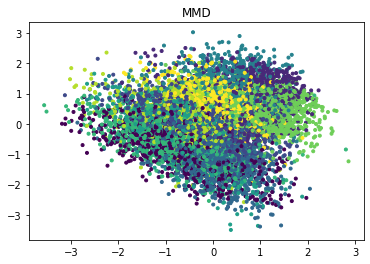

In [5]:
from dataset import load_mnist
from training import embedding
from plotting import plot_embedding_space

test_data, labels = load_mnist(train=False)

embeddings_mmd = embedding(lambda x: vae_mmd._encoder(x)[1], test_data)
plot_embedding_space(embeddings_mmd, labels, "MMD")

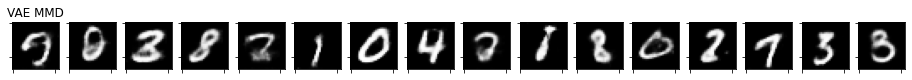

In [7]:
from training import generate_images
from plotting import plot_images

images = generate_images(vae_mmd._encoder, vae_mmd._decoder)
plot_images(images, "VAE MMD")

## [Generative Moment Matching Networks, 2015](https://arxiv.org/pdf/1502.02761.pdf)

Straight forward application of the generator only:

<img src="images/GMMN.png" width="700"/>

A working implementation [here](https://github.com/Abhipanda4/GMMN-Pytorch).